# Image Data PreProcessing

# # Importing necessary Libreries

In [25]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")



# Data Augumentation



In [29]:
# Data Generator

train_data_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=90,
                                          width_shift_range=0.4,
                                          fill_mode='reflect',
                                          vertical_flip=True,
                                          channel_shift_range=150.0,
                                          zoom_range=[0.5, 1.5],
                                          shear_range=45.0,
                                          brightness_range=(0.2, 0.8))

test_data_generator = ImageDataGenerator(rescale=1./255)

# Applying ImageDataGenerator Functionality To Trainset 

In [36]:
train_data = train_data_generator.flow_from_directory(r"./Dataset/Dataset/train_set",
                                                      target_size=(64,64),
                                                      batch_size=50,
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      color_mode='rgb')
#Applying ImageDataGenerator Functionality To  Testset

test_data = test_data_generator.flow_from_directory(r"./Dataset/Dataset/test_set",
                                                      target_size=(64,64),
                                                      batch_size=50,
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      color_mode='rgb')                                                  

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


# Model Building

In [37]:
# Initializing the Model
model = Sequential()
# Adding CNN Layers
#convolution and Pooling layer 1
model.add(Conv2D(filters=48,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.4))

#convolution and Pooling layer 2
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.4))

#Flattening the images
model.add(Flatten())

# Add Dense Layer
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 48)        1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        13856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [33]:
# Adding call to Avoid Overfitting

early_stop = EarlyStopping(monitor="val_accuracy",
                           min_delta=0.003,
                           patience=6, 
                           verbose=1, 
                           mode='auto',
                           restore_best_weights=True)

lr = ReduceLROnPlateau(monitor="val_accuracy",
                      factor=0.2,
                      patience=3,
                      verbose=1,
                      mode="auto",
                      min_delta=0.003,
                      cooldown=1)

callback = [early_stop,lr]

In [38]:
# Configuring the Learning Process
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [39]:
# Training The Model
result = model.fit(train_data,
                  epochs=30,
                  callbacks=callback,
                  validation_data=test_data)


Epoch 1/30
9/9 [==============================] - 57s 6s/step - loss: 0.6651 - accuracy: 0.6284 - val_loss: 0.5655 - val_accuracy: 0.7603 - lr: 0.0010
Epoch 2/30
9/9 [==============================] - 33s 4s/step - loss: 0.5816 - accuracy: 0.7454 - val_loss: 0.3454 - val_accuracy: 0.9339 - lr: 0.0010
Epoch 3/30
9/9 [==============================] - 34s 4s/step - loss: 0.4237 - accuracy: 0.7913 - val_loss: 0.1937 - val_accuracy: 0.9091 - lr: 0.0010
Epoch 4/30
9/9 [==============================] - 35s 4s/step - loss: 0.3437 - accuracy: 0.8509 - val_loss: 0.1041 - val_accuracy: 0.9504 - lr: 0.0010
Epoch 5/30
9/9 [==============================] - 32s 3s/step - loss: 0.3531 - accuracy: 0.8486 - val_loss: 0.0785 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 6/30
9/9 [==============================] - 32s 4s/step - loss: 0.3093 - accuracy: 0.8578 - val_loss: 0.1054 - val_accuracy: 0.9669 - lr: 0.0010
Epoch 7/30
9/9 [==============================] - 30s 3s/step - loss: 0.3184 - accuracy: 0.853

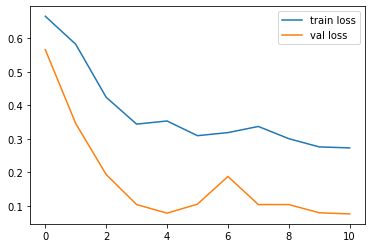

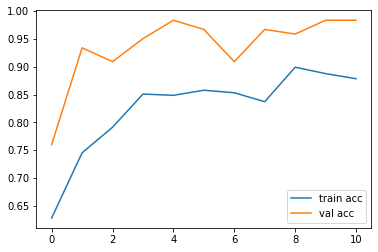

In [41]:
#plot the loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [42]:
np.save('my_history.npy',result.history)

In [43]:
#Save the Model
model.save('Forest_Fire.h5')

In [44]:
#Test Model
saved_model = load_model('forest_Fire.h5')

In [12]:
#Predict The Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2


In [23]:
model = load_model("forest_fire.h5")

In [27]:

img=image.load_img(r'Dataset\Dataset\test_set\forest\0.48007200_1530881924_final_forest.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
x = np.expand_dims(res, axis=0)

In [28]:
pred = model.predict(x)
pred = int(pred[0][0])
pred

0

In [31]:
img=image.load_img(r'Dataset\Dataset\test_set\with fire\19464620_401.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
x = np.expand_dims(res, axis=0)

In [32]:
pred = model.predict(x)
pred = int(pred[0][0])
pred

1